In [5]:
#Importing the libraries 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import os 
#loading the dataset
filepath= os.path.join(os.getcwd(),'G4_howell.csv')
df=pd.read_csv(filepath)

In [6]:
#loading the dataset
filepath= os.path.join(os.getcwd(),'G4_howell.csv')
df=pd.read_csv(filepath)

In [7]:
#Showing the first 5 values 
df.head()

,sex,age,weight,height,Overweight
0,M,63.28,47.6 kg,160.7,NaN
1,M,64.50,47.8 kg,151.8,NaN
2,F,60.28,34.1 kg,140.0,NaN
3,F,61.50,36.5 kg,139.7,NaN
4,F,65.28,31.9 kg,136.5,NaN


In [8]:
#Showing the last 5 values 
df.tail()

,sex,age,weight,height,Overweight
94,M,19.81,NaN,146.7,NaN
95,F,17.81,44.7,157.5,NaN
96,M,12.56,22,127.0,NaN
97,M,14.11,24.3,129.5,NaN
98,M,13.81,24.5,128.3,NaN


In [9]:
#Checking for the shape of the Values 
df.shape

(99, 5)

In [10]:
#Getting some stats
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   sex         99 non-null     object 
 1   age         99 non-null     float64
 2   weight      89 non-null     object 
 3   height      99 non-null     float64
 4   Overweight  0 non-null      float64
dtypes: float64(3), object(2)
memory usage: 4.0+ KB


In [11]:
df.describe()

,age,height,Overweight
count,99.000000,99.000000,0.0
mean,31.017374,142.256566,NaN
std,18.820718,17.767404,NaN
min,3.870000,86.400000,NaN
25%,14.690000,133.150000,NaN
50%,29.500000,146.700000,NaN
75%,44.565000,153.800000,NaN
max,73.500000,171.500000,NaN


In [12]:
#How many Males and females 
df['sex'].value_counts()

F    57
M    42
Name: sex, dtype: int64

In [13]:
# Checking for the Null Values 
df.isna().sum()

sex            0
age            0
weight        10
height         0
Overweight    99
dtype: int64

In [21]:
#First we need to remove the Kg part to make the cloumn Numeric

df['weight'] = df['weight'].str.replace(' kg', '')
df

,sex,age,weight,height,Overweight
0,M,63.28,47.6,160.7,NaN
1,M,64.50,47.8,151.8,NaN
2,F,60.28,34.1,140.0,NaN
3,F,61.50,36.5,139.7,NaN
4,F,65.28,31.9,136.5,NaN
...,...,...,...,...,...
94,M,19.81,NaN,146.7,NaN
95,F,17.81,44.7,157.5,NaN
96,M,12.56,22,127.0,NaN
97,M,14.11,24.3,129.5,NaN


In [31]:
#Second we Impute the missing Values Which is 10 by using the avg mean Values

df['weight'] = df['weight'].astype(float)

# Calculate the mean of the column
mean_value = df['weight'].mean()

# Impute the missing values with the mean
df['weight'].fillna(mean_value, inplace=True)
df["weight"] = df["weight"].round(2)

In [42]:
#Overweight Column Now 
df["Overweight"] = df["weight"] / (df["height"] ** 2) * 10000

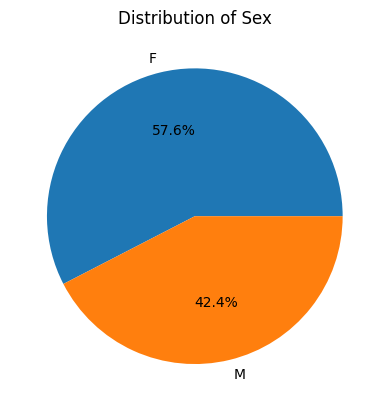

In [40]:
#Viz Part 
#Pie chart to the Sex Column 
# Count the occurrences of each category in the "sex" column
sex_counts = df["sex"].value_counts()

# Create a pie chart
plt.pie(sex_counts, labels=sex_counts.index, autopct='%1.1f%%')

# Add a title
plt.title("Distribution of Sex")

# Display the chart
plt.show()

In [50]:
#Age According to the Over Weight
sorted_df = df.sort_values("Overweight", ascending=False)

# Get the first row, which will have the highest value in the "Overweight" column
most_overweight_person = sorted_df.iloc[0]

age = most_overweight_person["age"]
overweight = most_overweight_person["Overweight"]
print("The most overweight person is {} years old with an overweight value of {}.".format(age, overweight))

The most overweight person is 8.81 years old with an overweight value of 30.286461507043786.


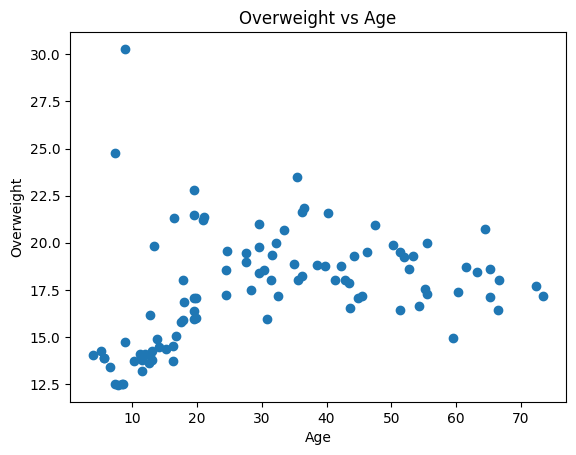

In [52]:
#Sort the Values according to the overweight and age 
# Sort the DataFrame by "Overweight" and "Age" columns
sorted_df = df.sort_values(["Overweight", "age"])

# Get the sorted age and overweight values
ages = sorted_df["age"]
overweights = sorted_df["Overweight"]

# Plot the scatter plot
plt.scatter(ages, overweights)

# Set labels and title
plt.xlabel("Age")
plt.ylabel("Overweight")
plt.title("Overweight vs Age")

# Display the plot
plt.show()

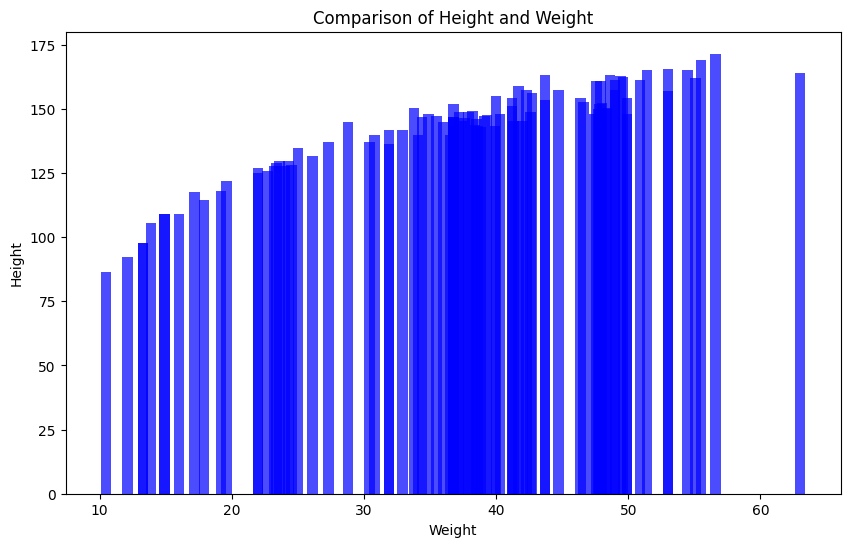

In [58]:
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(10, 6))

# Create the bar chart
plt.bar(df["weight"], df["height"], color="blue", alpha=0.7)

# Set labels and title
plt.xlabel("Weight")
plt.ylabel("Height")
plt.title("Comparison of Height and Weight")

# Display the plot
plt.show()


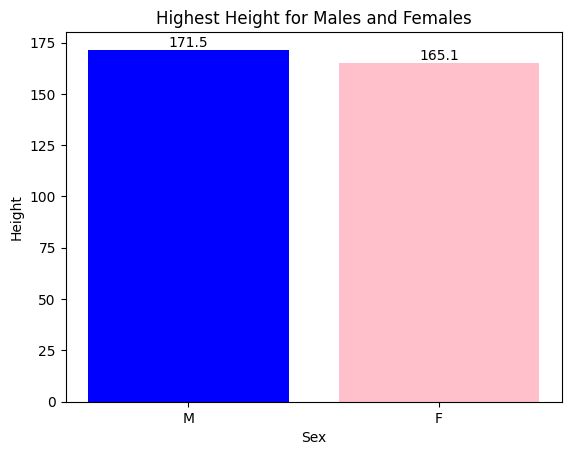

In [63]:
# Filter the data for males and females
male_data = df[df["sex"] == "M"]
female_data = df[df["sex"] == "F"]

# Find the highest height for males and females
max_height_male = male_data["height"].max()
max_height_female = female_data["height"].max()

# Create a bar chart to display the highest heights
plt.bar(["M", "F"], [max_height_male, max_height_female], color=["blue", "pink"])

# Add height values on top of the bars
plt.text(0, max_height_male, str(max_height_male), ha="center", va="bottom")
plt.text(1, max_height_female, str(max_height_female), ha="center", va="bottom")

# Set labels and title
plt.xlabel("Sex")
plt.ylabel("Height")
plt.title("Highest Height for Males and Females")

# Display the plot
plt.show()
